In [1]:
from gensim.models import KeyedVectors

# Carica un modello di embedding preaddestrato (es. FastText o Word2Vec)
model_path = "/home/acarugat/cc.it.300.vec"  # Sostituisci con il percorso del modello
word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=False)

In [6]:
# Esempi:

c=word_vectors.get_vecattr("casa","count")
print (c)

vettore_casa = word_vectors['casa']
#print (vettore_casa)

# Calcola similarità tra due parole
if 'pace' in word_vectors.key_to_index and 'serenità' in word_vectors.key_to_index:
    similarita = word_vectors.similarity('pace', 'serenità')
    print(f"Similarità tra 'pace' e 'serenità': {similarita}")

1999834
Similarità tra 'pace' e 'serenità': 0.6244337558746338


In [7]:
print (word_vectors.similarity('Inter', 'Milan'))

0.700345


In [9]:
# Scarica le risorse necessarie di NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string


#nltk.download('punkt')
#nltk.download('stopwords')

# Pre-processamento del testo
def preprocessa_testo(text):
    stop_words = set(stopwords.words('italian'))  # Stop words in italiano
    tokens = word_tokenize(text.lower())         # Tokenizzazione
    tokens = [word for word in tokens if word.isalnum()]  # Rimuovi punteggiatura
    tokens = [word for word in tokens if word not in stop_words]  # Rimuovi stop words
    return tokens

# Testo da analizzare
# Metodo con il contesto `with` (raccomandato)
file_path = "/home/acarugat/DiscorsoMattarellaFine2024.txt"

# Leggi il contenuto del file
with open(file_path, 'r', encoding='utf-8') as file:
    testo = file.read()

tokens = preprocessa_testo(testo)

print(tokens)


['care', 'concittadine', 'cari', 'concittadini', 'incontro', 'tradizionale', 'consente', 'rivolgere', 'augurio', 'sincero', 'trova', 'italia', 'italiani', 'estero', 'vivendo', 'ogni', 'fine', 'anno', 'ore', 'attesa', 'tempo', 'nuovo', 'viene', 'speriamo', 'migliore', 'ore', 'cerchiamo', 'serenità', 'rinsaldando', 'rapporti', 'comunità', 'famiglie', 'amicizie', 'auguri', 'riceviamo', 'soltanto', 'rito', 'dimostrazione', 'natura', 'autentica', 'chiama', 'relazione', 'altri', 'dobbiamo', 'farlo', 'tanto', 'viviamo', 'momenti', 'difficili', 'quando', 'migliaia', 'vittime', 'civili', 'guerre', 'corso', 'turbano', 'tragicamente', 'coscienze', 'notte', 'natale', 'diffusa', 'notizia', 'gaza', 'bambina', 'pochi', 'giorni', 'morta', 'assiderata', 'stessa', 'notte', 'natale', 'feroci', 'bombardamenti', 'russi', 'colpito', 'centrali', 'energia', 'città', 'ucraina', 'costringere', 'popolazione', 'civile', 'buio', 'gelo', 'innocenti', 'rapiti', 'hamas', 'tuttora', 'ostaggi', 'vivono', 'secondo', 'in

In [11]:
# Parole presenti nel vocabolario del modello
import pandas as pd 

# Pre-processamento del testo
def preprocessa_testo(text):
    stop_words = set(stopwords.words('italian'))  # Stop words in italiano
    tokens = word_tokenize(text.lower())         # Tokenizzazione
    tokens = [word for word in tokens if word.isalnum()]  # Rimuovi punteggiatura
    tokens = [word for word in tokens if word not in stop_words]  # Rimuovi stop words
    return tokens

tokens_unici = list(set(tokens))

parole_presenti = [word for word in tokens_unici if word in word_vectors.key_to_index]

tabella = []

for parola in parole_presenti:
    c=word_vectors.get_vecattr(parola,"count")
    tabella.append({"Parola": parola, "Frequenza": c})
df = pd.DataFrame(tabella)
print (df.sort_values(by=["Frequenza", "Parola"],ascending=False,ignore_index=True))

<class 'list'>
            Parola  Frequenza
0           essere    1999940
1             anni    1999923
2            parte    1999919
3            stato    1999915
4             dopo    1999897
..             ...        ...
760          sammy    1475880
761      calenzano    1472995
762     assiderata    1419791
763  divaricazioni    1344393
764         censis    1291949

[765 rows x 2 columns]


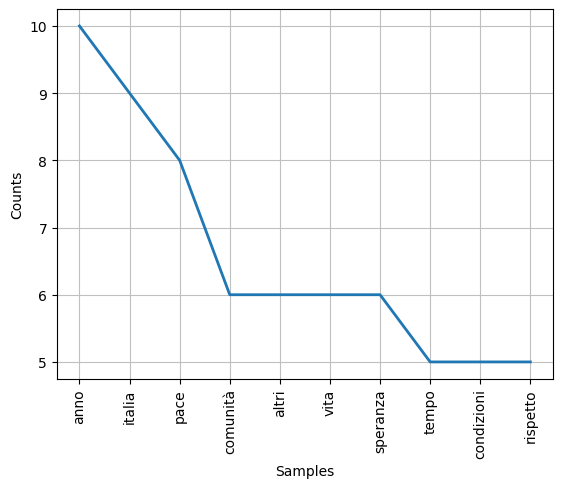

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
import nltk
freq_dist = nltk.FreqDist(tokens)
#for k,v in freq_dist.items():
    #print(str(k) + ':' + str(v))

# Infine, plottiamo i risultati ottenuti in un grafico per visualizzare quali sono gli argomenti più discussi all’interno della pagina
freq_dist.plot(10, cumulative=False)
#freq_dist.tabulate(10, cumulative=False)


In [53]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Imposta il numero di cluster
num_clusters = 20

vettori = [word_vectors[word] for word in parole_presenti]
           
# Converti la lista in un array NumPy
vettori_array = np.array(vettori)

# Applica t-SNE
tsne = TSNE(n_components=2, random_state=42)
vettori_ridotti = tsne.fit_transform(vettori_array)

# Esegui il clustering
#kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(vettori)

# Ottieni i cluster
clusters = kmeans.labels_

Cluster 0: ['truffe', 'risse', 'rapine', 'furti']


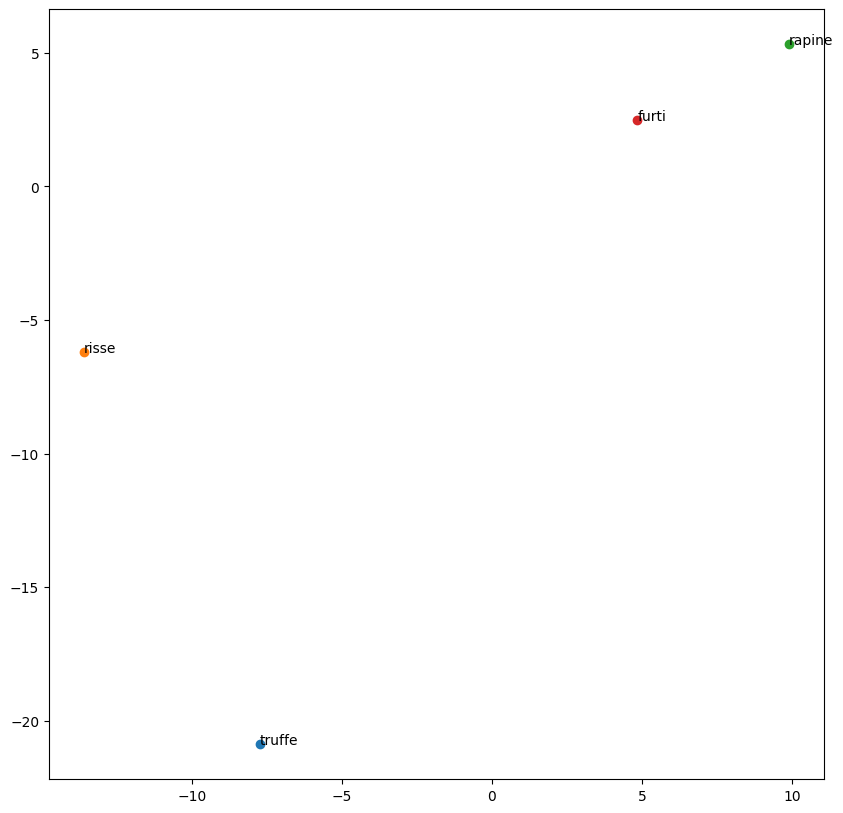

Cluster 1: ['diversi', 'tanti', 'mortali', 'esempi', 'eventi', 'medici', 'aggrediti', 'lavoratori', 'percorsi', 'reati', 'alcuni', 'innocenti', 'atleti', 'bassi', 'giorni', 'rapporti', 'pieni', 'cittadini', 'detenuti', 'gesti', 'ragazzi', 'operatori', 'porti', 'elementi', 'cari', 'armamenti', 'punti', 'giovani', 'operativi', 'crimini', 'diritti', 'propri', 'generosi', 'incidenti', 'salari', 'condotti', 'altri', 'grati', 'ostaggi', 'anni', 'pochissimi', 'auguri', 'straordinari', 'fili', 'mezzi', 'suicidi', 'sostenuti', 'russi', 'umani', 'insegnanti', 'rapiti', 'sentimenti', 'momenti', 'anziani', 'odiosi', 'confini', 'cinque', 'esami', 'nuovi', 'teatri', 'paesi', 'ispirati', 'pochi', 'tempestivi', 'laureati', 'coinvolti', 'dollari', 'fenomeni', 'successi', 'essi', 'uomini', 'allievi', 'militari', 'omicidi', 'sport', 'modelli', 'giornalisti', 'risultati', 'miliardi', 'fatti', 'necessari', 'volontari', 'vicini', 'femminicidi', 'quali', 'conflitti', 'letti', 'naturali', 'civili', 'positivi'

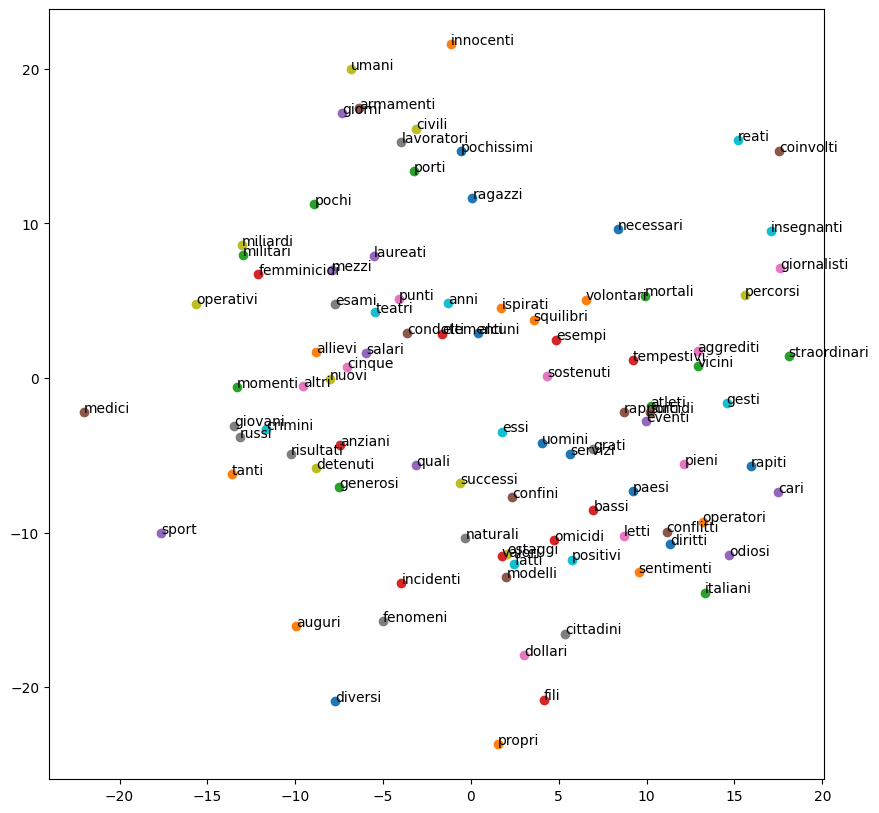

Cluster 2: ['nord', 'morta', 'gelo', 'città', 'vivo', 'clima', 'natale', 'notte', 'sera', 'deserto', 'vivere', 'vivendo', 'mondo', 'vivono', 'sud', 'vive', 'paese', 'meteo']


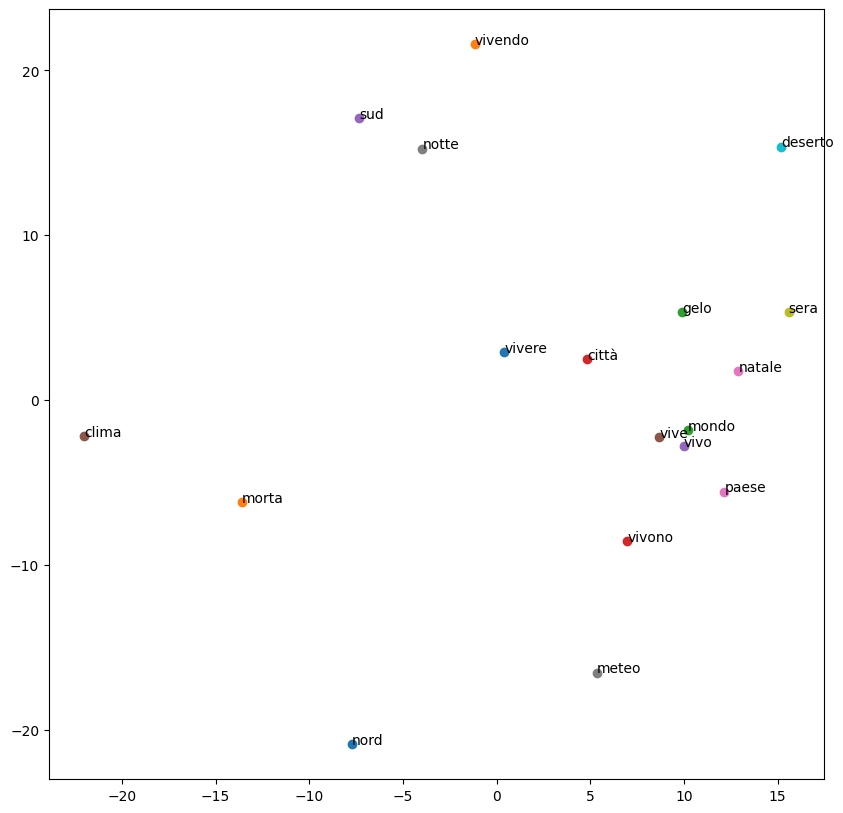

Cluster 3: ['numerose', 'droghe', 'lacerate', 'medicine', 'rischiose', 'ragioni', 'solitudini', 'donne', 'nuove', 'poste', 'ripetute', 'amicizie', 'interne', 'faglie', 'persone', 'montane', 'profonde', 'ore', 'guerre', 'lunghe', 'vittime', 'cure', 'concrete', 'tante', 'altre', 'centrali', 'aspirazioni', 'coscienze', 'distanze', 'forme', 'tecnologie', 'uccise', 'sciagurate', 'prive', 'abitazioni', 'sciagure', 'vecchie', 'pubbliche', 'esigenze', 'origini', 'risposte', 'parole', 'aggressioni', 'nascite', 'attese', 'grida', 'bellezze', 'notti', 'feroci', 'otto', 'condizioni', 'opinioni', 'scelte', 'famiglie', 'armi', 'forze', 'alluvioni', 'frequenti', 'disumane', 'care', 'ragazze', 'aree', 'liste', 'volte', 'malattie', 'migliaia', 'ritenute', 'relazioni']


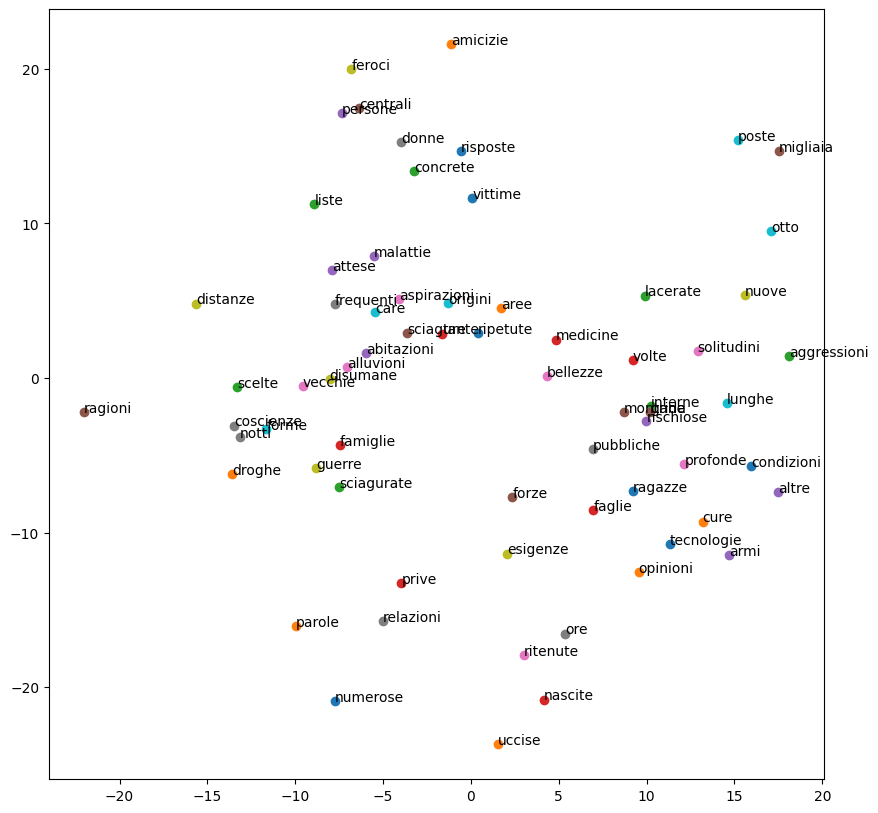

Cluster 4: ['svolgono', 'diventa', 'traduce', 'trovano', 'rende', 'assicurano', 'costringe', 'risiede', 'risparmiano', 'avviene', 'reca', 'attraversano', 'lavora', 'indica', 'accade', 'richiede', 'diviene', 'resistono', 'presenta', 'chiama', 'rimane', 'esprimono', 'registra', 'conduca', 'aprono', 'avvertono', 'incide', 'coinvolge', 'esercita', 'recano', 'rischiano', 'trasmette', 'ostacola', 'aumenta', 'provocano', 'rafforza', 'ricompongono', 'espande', 'subiamo', 'insegnano', 'studia', 'intendono', 'generano', 'sembra', 'turbano', 'propone', 'dipende', 'segnala', 'animano', 'manifesta', 'contrasta', 'rendono', 'consente', 'occorre', 'poggia', 'risulta', 'rinunciano', 'tocca', 'dedicano', 'rispettano', 'rivolgiamo', 'lacerano', 'tiene', 'stride', 'consentirà', 'possono', 'impegna', 'affacciano', 'intrecciano', 'riceviamo', 'riguardano', 'trova', 'pagano', 'manifestano', 'prepara', 'aggredisce', 'compete', 'contribuisce']


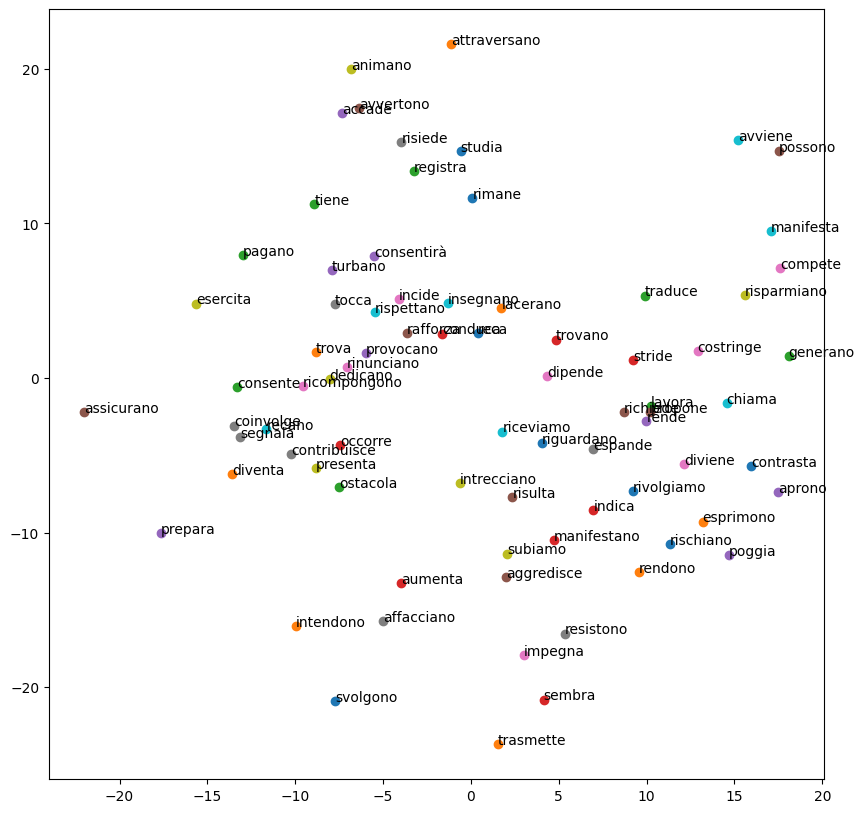

Cluster 5: ['giulia', 'cop', 'sammy', '29', 'gaza', 'hamas', '2013', 'baku']


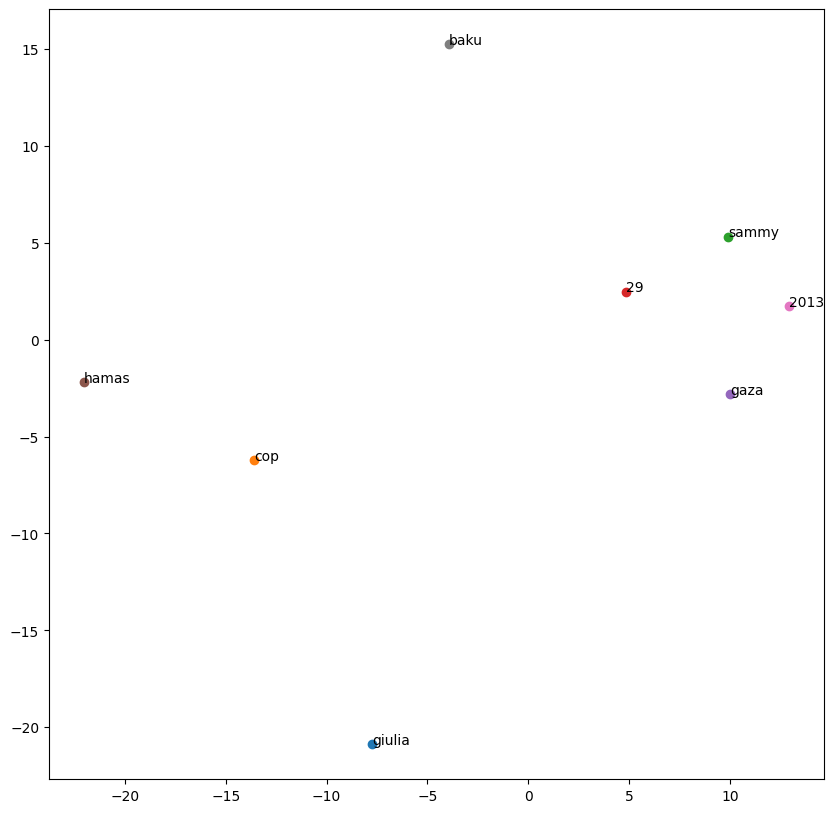

Cluster 6: ['disagio', 'ovunque', 'paralimpico', 'toccato', 'riorientare', 'ricordo', 'evitando', 'rumore', 'alimentati', 'colmare', 'rispetto', 'risuonare', 'successo', 'entusiasmo', 'personale', 'contrapposizioni', 'fondamento', 'salvare', 'oriente', 'segnato', 'patriottismo', 'impegnate', 'bombardamenti', 'cambiamento', 'contributo', 'massimo', 'rifuggendo', 'sballo', 'eppure', 'incontrato', 'autentico', 'difficoltà', 'coltivare', 'protagoniste', 'divaricazioni', 'vissuto', 'capace', 'causato', 'impegnati', 'operare', 'tradurre', 'interpreto', 'riconoscenza', 'livello', 'penitenziario', 'desidero', 'potenzialità', 'ciascuno', 'consentito', 'indice', 'riallacciare', 'italiano', 'sottoposto', 'altrove', 'attorno', 'aperto', 'rivolgere', 'lavoro', 'assicurato', 'consolidare', 'diffondersi', 'grato', 'fronte', 'sovente', 'rapporto', 'drammaticamente', 'ascoltare', 'abbandono', 'trasformare', 'interno', 'sconfortante', 'assieme', 'risolvere', 'assiderata', 'dimostrazione', 'giusto', 'gen

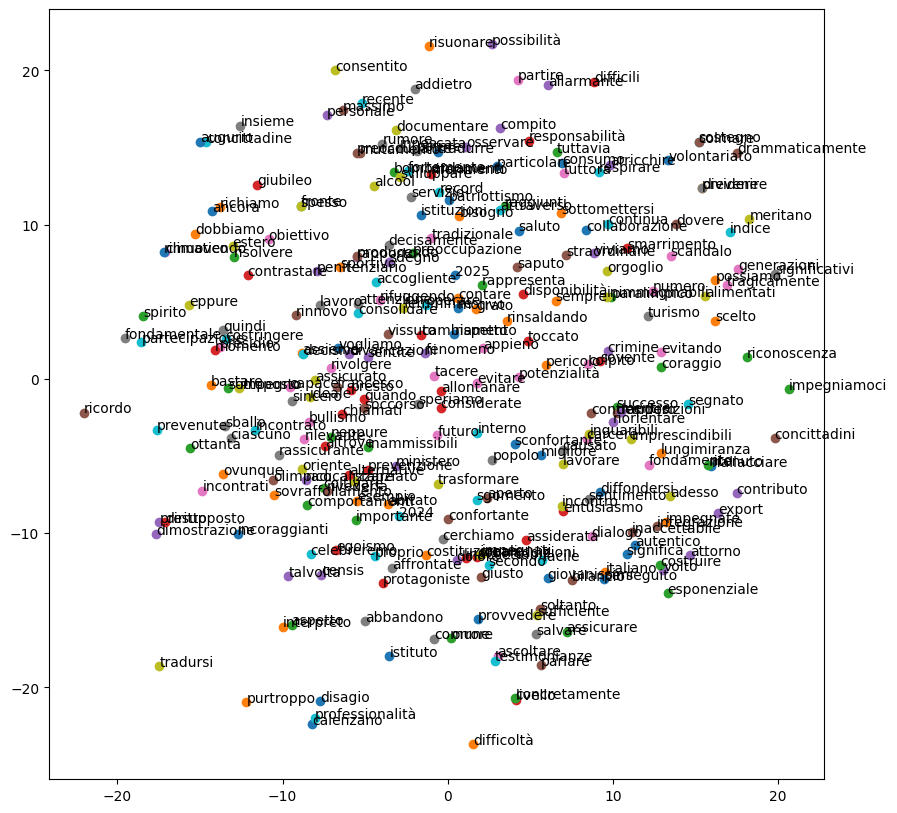

Cluster 7: ['g7']


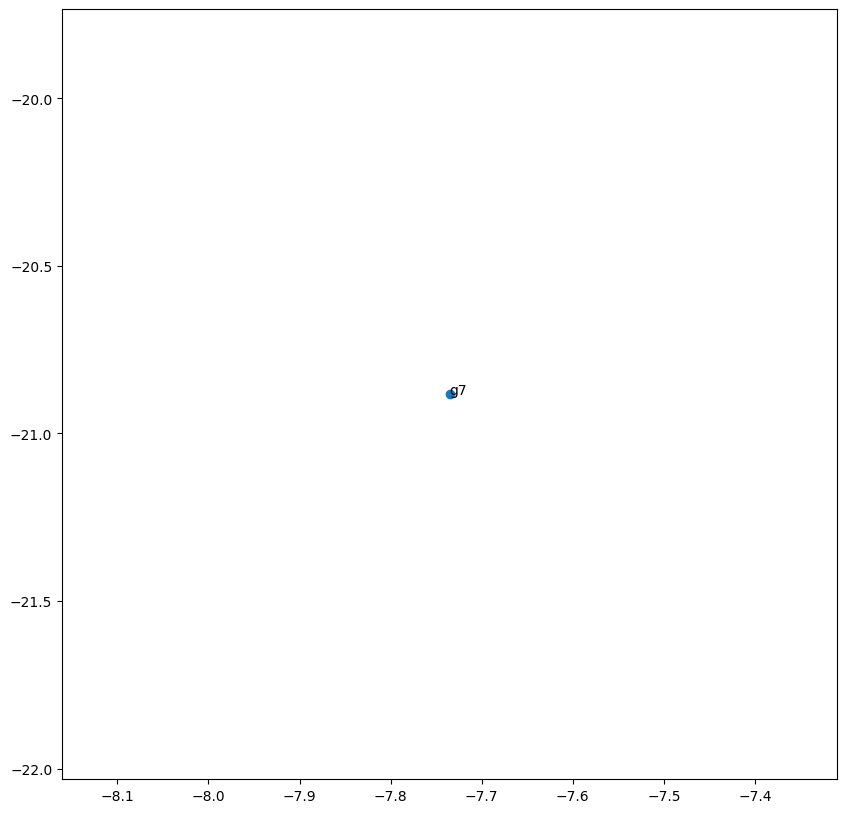

Cluster 8: ['va']


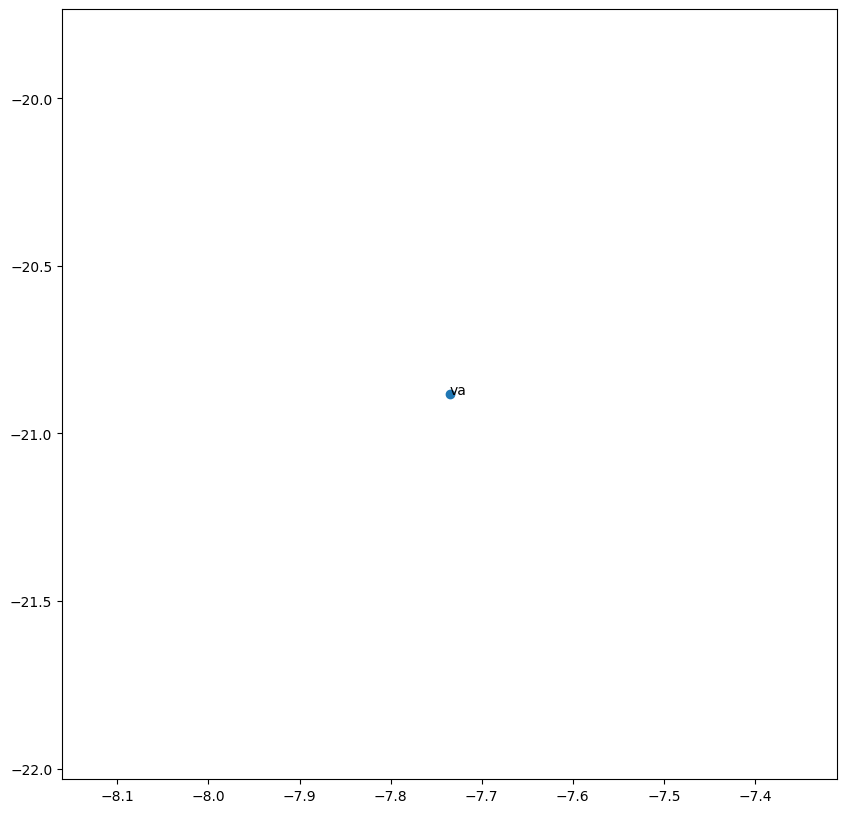

Cluster 9: ['avvio', 'ordine', 'verso', 'alto', 'corso', 'passo', 'valore', 'tempo', 'basso', 'fino', 'caro', 'idea', 'così', 'quel', 'invio', 'quest', 'pronto', 'd', 'modo', 'dopo', 'buon', 'fine', 'rito', 'oltre', 'segno', 'uso', 'fatto', 'stato', 'medio', 'inizio', 'periodo', 'web', 'tanto', 'anno', 'bell', 'evento', 'prezzo', 'papa', 'ogni', 'senso', 'via', 'ancor', 'stesso', 'primo', 'poco', 'nuovo']


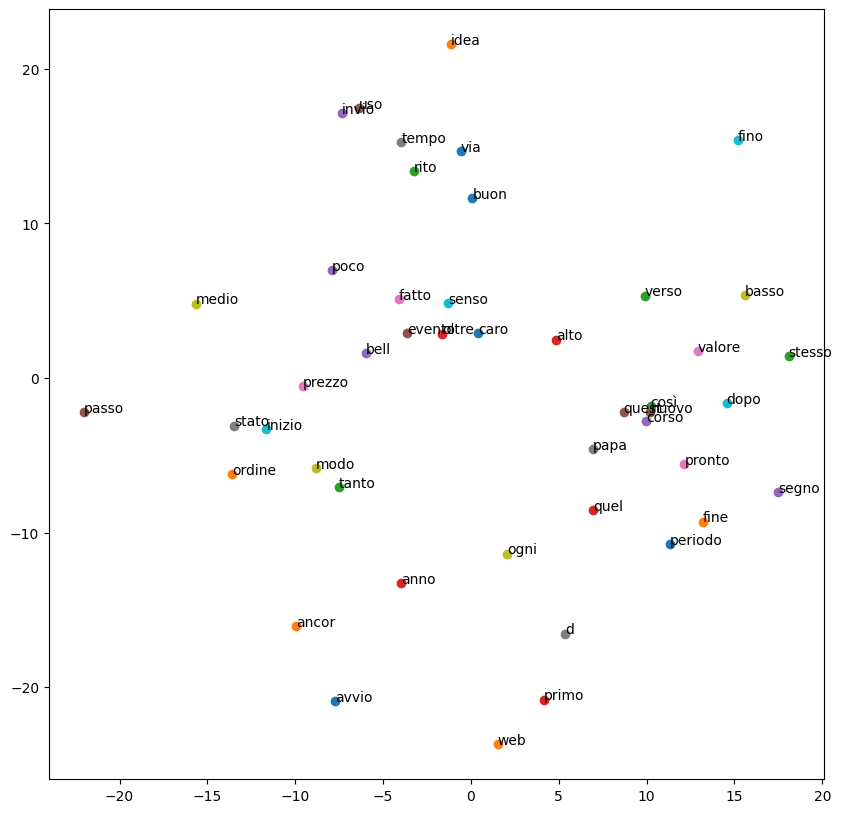

Cluster 10: ['ben', 'mai', 'stati', 'devono', 'essersi', 'vengano', 'vanno', 'essere', 'viene']


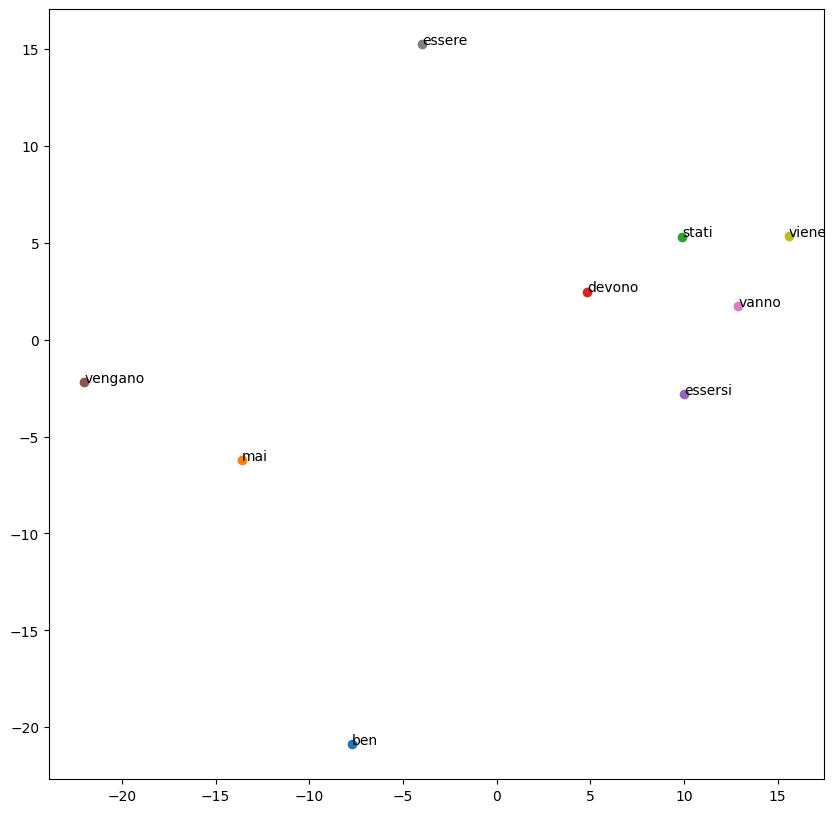

Cluster 11: ['attesa', 'patria', 'storia', 'debolezza', 'libertà', 'aria', 'militare', 'severità', 'presidenza', 'parola', 'festività', 'treccani', 'piena', 'bambina', 'serenità', 'quotidiana', 'arte', 'unità', 'ultima', 'nave', 'aggressione', 'riduzione', 'attrazione', 'illegalità', 'medesima', 'scienza', 'comprensione', 'umanità', 'civiltà', 'unione', 'tragedia', 'sensibilità', 'italiana', 'sicurezza', 'natura', 'europea', 'enciclopedia', 'esigenza', 'ampia', 'cifra', 'centrifuga', 'sproporzione', 'incertezza', 'impotenza', 'civile', 'europa', 'precarietà', 'forza', 'energia', 'stessa', 'strada', 'giustizia', 'cultura', 'solidarietà', 'crisi', 'cornice', 'positiva', 'ricorrenza', 'storica', 'creativa', 'base', 'grande', 'trama', 'sorte', 'libera', 'parte', 'bandiera', 'mediazione', 'collettiva', 'formazione', 'sala', 'realtà', 'cassa', 'vitale', 'cura', 'attuale', 'ucraina', 'italia', 'comunità', 'trieste', 'politica', 'generazione', 'coscienza', 'convivenza', 'espressione', 'cecilia

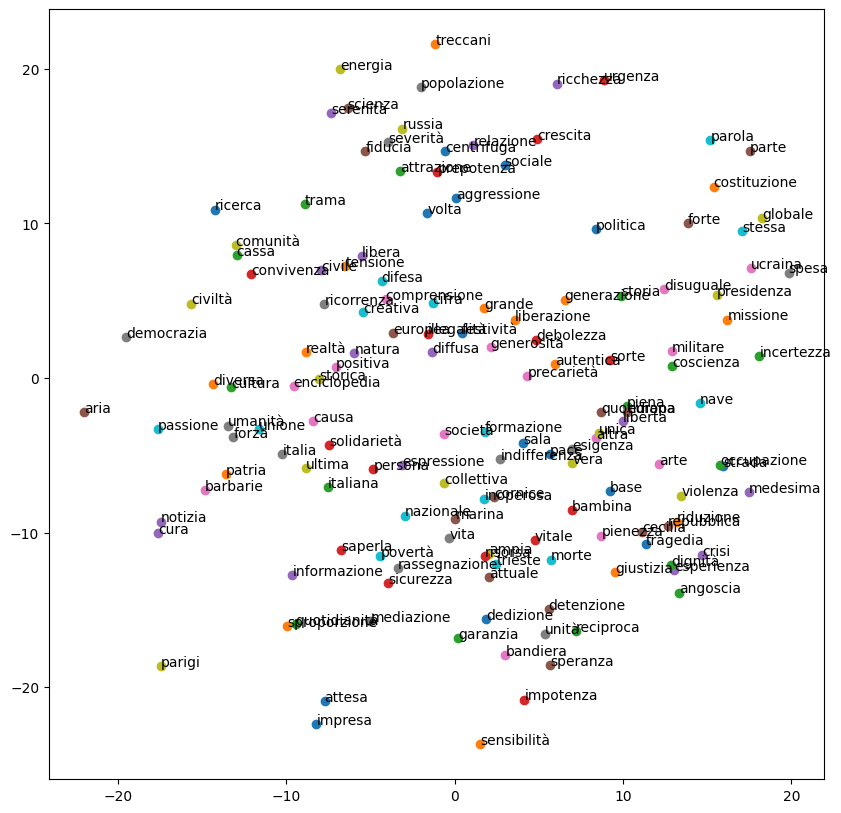

Cluster 12: ['voto']


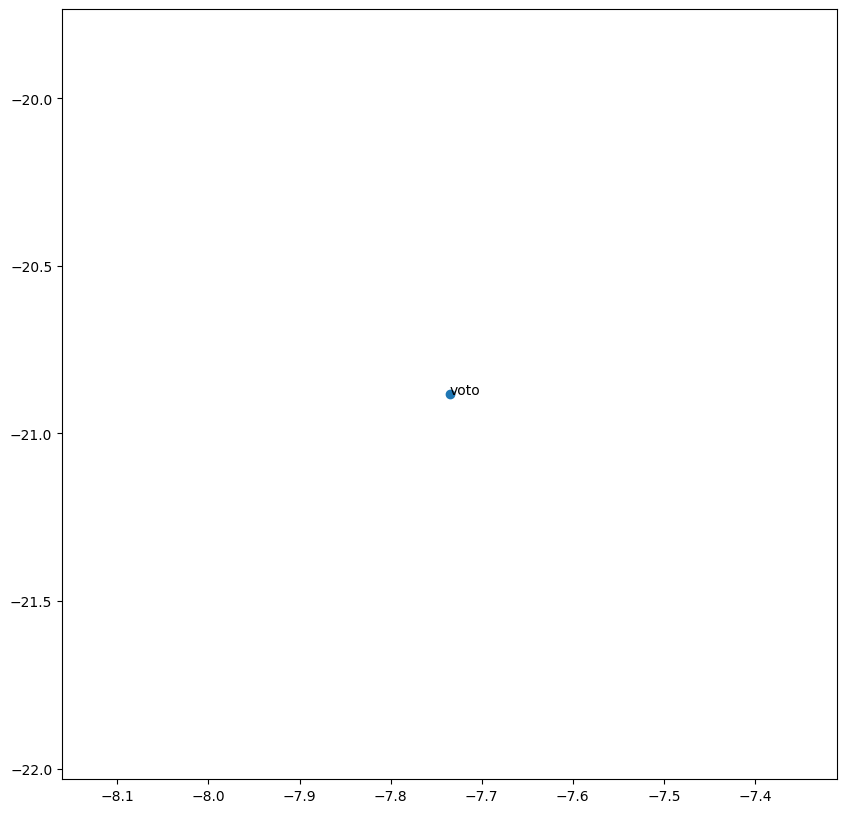

Cluster 13: ['là']


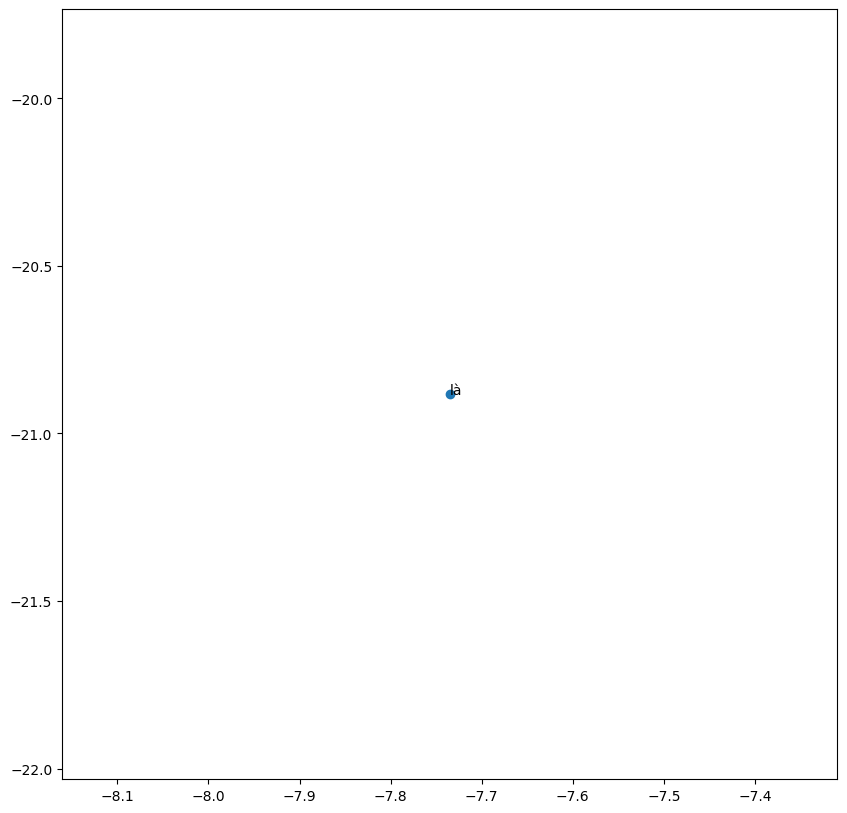

Cluster 14: ['leggi', 'norme']


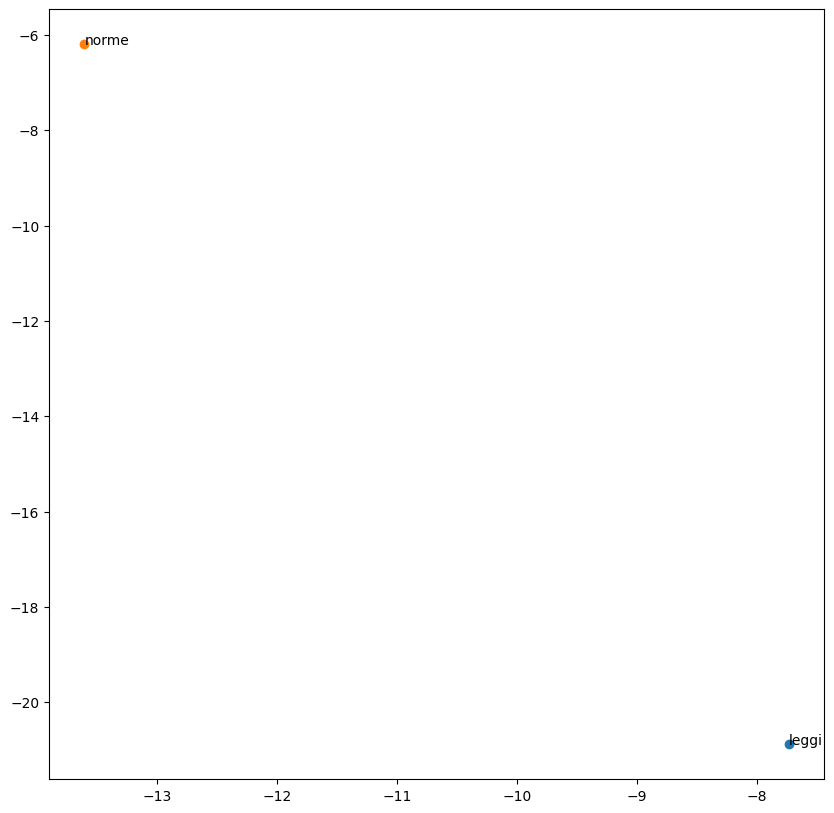

Cluster 15: ['sé']


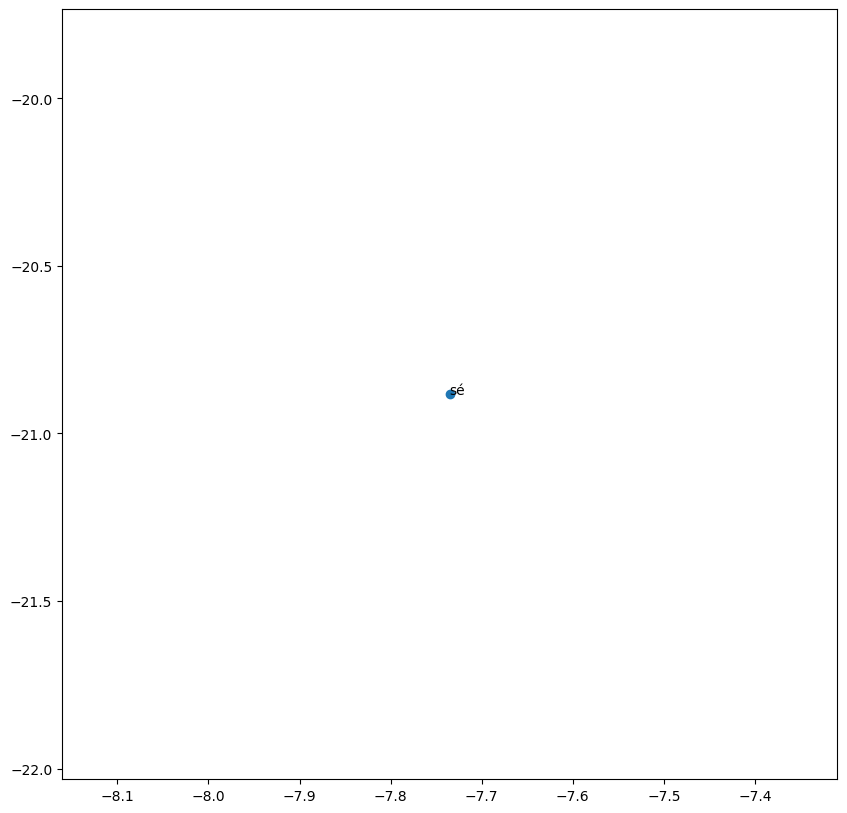

Cluster 16: ['fa']


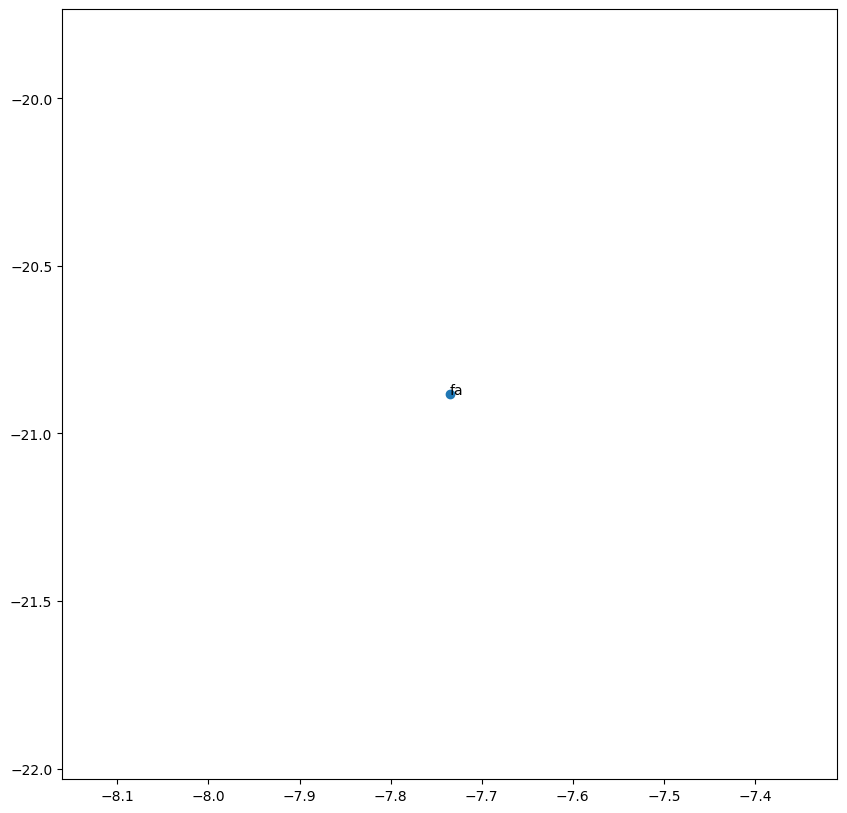

Cluster 17: ['luci', 'ombre', 'buio']


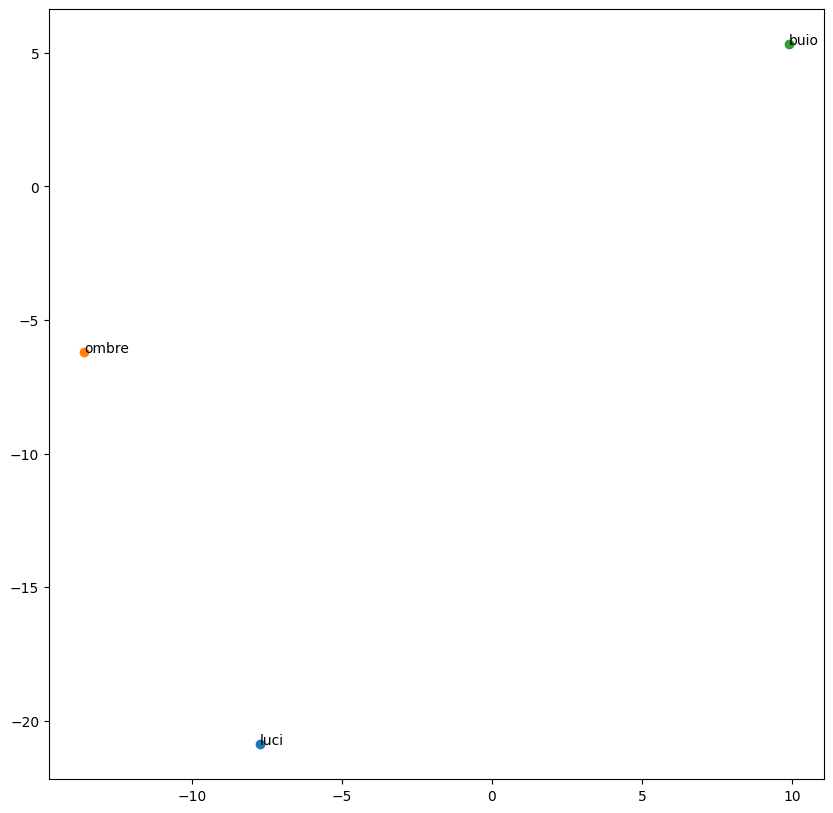

Cluster 18: ['bene', 'farlo', 'ama', 'dare', 'può', 'agire', 'dover', 'ciò', 'deve', 'cosa']


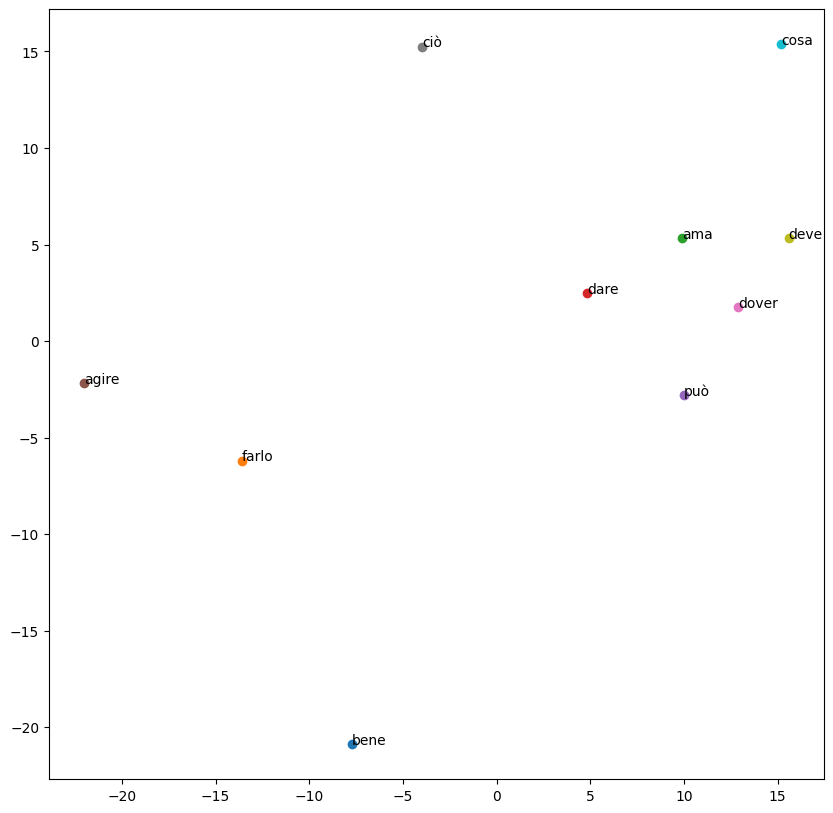

Cluster 19: ['dati']


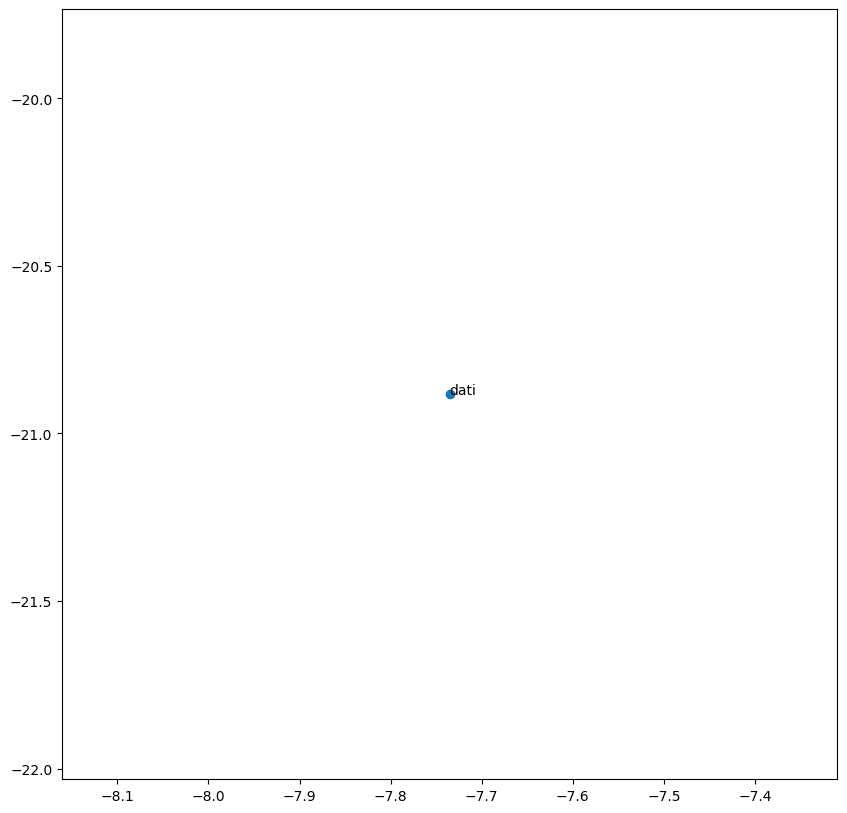

In [54]:
# Raggruppa le parole per cluster
cluster_parole = {i: [] for i in range(num_clusters)}
for parola, cluster in zip(parole_presenti, clusters):
    cluster_parole[cluster].append(parola)

# Visualizza i cluster
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")
    plt.figure(figsize=(10, 10))
    for i, parola in enumerate(parole):
        plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
        plt.annotate(parola, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
    plt.show()


In [49]:
dati_ridotti = tsne.fit_transform(vettori_array)

[[ -7.7352414 -20.883026 ]
 [-13.603681   -6.1976814]
 [  9.899327    5.3186197]
 ...
 [ -5.709413  -10.146567 ]
 [  5.702361   -4.021645 ]
 [  2.6270316   6.6521497]]


In [52]:
# Applica KMeans per creare cluster
n_clusters = 10  # Numero di cluster
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
labels = kmeans.fit_predict(vettori_array)

[9 1 1 6 1 9 1 1 1 6 1 1 6 9 9 1 1 7 6 9 1 9 1 1 1 1 1 9 9 1 1 7 1 7 1 1 1
 1 1 1 1 9 7 8 9 6 1 1 6 1 1 9 9 1 9 1 1 1 1 1 9 6 6 1 1 6 7 1 1 9 1 9 6 7
 1 7 1 1 6 7 6 6 1 1 1 1 1 1 1 1 1 6 7 1 1 1 1 9 9 7 6 1 1 9 1 7 1 1 6 9 6
 9 7 1 1 1 1 7 6 1 9 1 1 1 6 7 1 1 1 1 7 1 9 1 1 1 1 9 6 6 1 1 7 1 1 1 9 6
 1 1 1 1 7 6 7 7 1 7 1 9 1 6 4 1 1 1 1 1 1 6 1 9 9 1 1 1 1 6 6 1 9 9 1 7 2
 1 9 1 6 6 1 6 1 1 1 6 1 1 9 9 9 1 1 9 6 9 1 6 1 1 6 6 1 1 7 1 6 6 6 1 1 7
 1 1 1 6 1 9 7 1 7 1 1 1 6 6 1 6 9 1 1 9 1 1 1 6 1 1 1 7 6 6 6 1 1 1 6 1 1
 6 6 1 6 1 9 1 6 1 1 1 1 1 9 1 9 6 9 1 1 1 1 1 7 1 1 1 0 1 1 1 9 9 1 1 1 2
 9 6 7 1 6 6 1 9 6 9 1 7 6 1 1 6 1 1 7 7 1 6 6 5 1 1 9 6 6 6 6 1 9 1 1 6 9
 1 1 1 1 7 1 1 6 9 1 1 1 1 9 7 9 1 6 1 1 1 6 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 6 6 1 6 1 1 9 9 1 1 1 6 9 1 1 9 7 1 1 6 1 9 9 1 7 6 1 1 1 1 7 1 9
 6 6 9 1 9 1 1 9 1 6 1 1 6 1 6 1 9 1 9 1 1 7 1 1 1 9 1 1 6 9 6 6 1 1 1 1 9
 1 9 6 7 1 1 2 1 1 1 7 9 1 9 1 9 1 7 1 6 1 1 9 6 1 1 1 1 6 1 9 1 7 6 9 9 9
 1 1 6 6 1 1 1 7 6 1 1 1 

In [ ]:
# Crea un grafico scatter con colori basati sui cluster
plt.figure(figsize=(10, 6))
plt.scatter(dati_ridotti[:, 0], dati_ridotti[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title("Visualizzazione dei Cluster")
plt.xlabel("Dimensione 1")
plt.ylabel("Dimensione 2")
plt.show()

In [ ]:
# Ottieni i cluster
clusters = kmeans.labels_
# Raggruppa le parole per cluster
cluster_parole = {i: [] for i in range(n_clusters)}
for parola, cluster in zip(parole_presenti, clusters):
    cluster_parole[cluster].append(parola)
# Visualizza i cluster
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")
    #plt.figure(figsize=(10, 10))
    #for i, parola in enumerate(parole):
    #    plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
    #    plt.annotate(parola, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
    #plt.show()

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Scarica le risorse necessarie
#nltk.download('punkt')
#nltk.download('stopwords')

# 1. Preprocessamento: Tokenizza e rimuovi stop words
stop_words = set(stopwords.words('italian'))
parole = word_tokenize(testo.lower())
parole_pulite = [word for word in parole if word.isalnum() and word not in stop_words]

# 2. Conta la frequenza delle parole
frequenze = Counter(parole_pulite)

# 3. Ordina per frequenza decrescente
frequenze_ordinate = frequenze.most_common()

# 4. Stampa le parole ordinate
print("Frequenze delle parole (ordinate):")
for parola, frequenza in frequenze_ordinate:
    print(f"{parola}: {frequenza}")



In [ ]:
import nltk

# Scarica le risorse necessarie
#nltk.download('punkt')

# Tokenizza il testo in frasi
frasi = nltk.sent_tokenize(testo, language="italian")

# Calcola le lunghezze delle frasi
frasi_lunghezze = [(frase.strip(), len(nltk.word_tokenize(frase, language="italian"))) for frase in frasi]

# Ordina per lunghezza decrescente
frasi_lunghezze.sort(key=lambda x: x[1], reverse=True)

# Stampa le frasi ordinate
#print("Frasi ordinate per lunghezza decrescente:")
#for frase, lunghezza in frasi_lunghezze:
#    print(f"Lunghezza: {lunghezza} parole -> Frase: '{frase}'")
    
import pandas as pd
pd.set_option('display.max_colwidth', None)

df=pd.DataFrame(frasi_lunghezze,  columns=["Frase", "Lunghezza(parole)"])

df

#from IPython.display import display, HTML
#display(HTML(df.to_html()))

In [ ]:
import spacy
from collections import Counter

# Load the SpaCy Italian model
nlp = spacy.load("it_core_news_md")

# Process the text with SpaCy
doc = nlp(testo)

# Create a Counter to count word frequencies
word_freq = Counter()

# Iterate over tokens and count only words (excluding punctuation, spaces, etc.)
for token in doc:
    if not token.is_punct and not token.is_space:
        word_freq[token.text.lower()] += 1  # Convert to lowercase for case-insensitive counting

# Print the word frequencies
for word, freq in word_freq.items():
    print(f"{word}: {freq}")


In [ ]:
import fasttext
# load the pretrained model
model=fasttext.load_model("/home/acarugat/cc.it.300.bin")

# get nearest neighbors for the interested words (100 neighbors)
arancia_nn=model.get_nearest_neighbors('arancia', k=100)
kiwi_nn=model.get_nearest_neighbors('kiwi', k=100)

# get only words sets (discard the similarity cosine)
arancia_nn_words=set([el[1] for el in arancia_nn])
kiwi_nn_words=set([el[1] for el in kiwi_nn])

# compute the intersection
common_similar_words=arancia_nn_words.intersection(kiwi_nn_words)

print (common_similar_words)


In [ ]:
# Step 1: Load the frequencies from the file into a dictionary
frequency_file = "/home/acarugat/sorted.it.word.unigrams.utf8"

# Dictionary to store word frequencies
word_frequencies = {}
word_words = {}

# Read the file and populate the dictionary
with open(frequency_file, "r", encoding="utf-8") as f:
    for line in f:
        #print (line)
        # Split the line into frequency and word
        parts = line.strip().split()
        if len(parts) == 2:  # Ensure the line has two elements
            frequency, word = parts
            word_frequencies[word] = int(frequency)
            word_words[word] = word

# Step 2: Analyze the text
# text = "ciao come stai oggi è una bella giornata"

# Tokenize the text (split into words)
# words = text.split()

# Retrieve frequencies for each word
word_frequencies_in_text = {word: word_frequencies.get(word, 0) for word in parole_presenti}

sorted_frequencies = sorted(word_frequencies_in_text.items(), key=lambda item: item[1], reverse=True)

# Print the results
for word, freq in sorted_frequencies:
    if freq == 0:
        print("Parola", word, "non presente nel dizionario")
    else:
        print(f"Word: {word}, Frequency: {freq}")


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")

In [ ]:
tokens = tokenizer.tokenize(testo)
print (tokens)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def calcola_similarita(a, b): 
    tfidf = vectorizer.fit_transform([a, b])
    return ((tfidf * tfidf.T).toarray())[0,1]

file1_path = "/home/acarugat/DiscorsoMattarellaFine2023.txt"

with open(file1_path, 'r', encoding='utf-8') as file: 
    testo1 = file.read()

file2_path = "/home/acarugat/DiscorsoMattarellaFine2024.txt"

with open(file2_path, 'r', encoding='utf-8') as file: 
    testo2 = file.read()

s=calcola_similarita(testo1,testo2)

print (s)


In [ ]:
import os
import pandas as pd
import numpy as np

# Initialize lists to store filenames and contents
filenames = []
contents = []

# Walk through the home directory and read all text files
print ("Dimmi che documenti vuoi analizzare: Presidenti Giornali o Parlamento")
line = input()

for root, dirs, files in os.walk("/home/acarugat/Testi/"+line):
    for file in files:
        if file.endswith(".txt"):  # Check if the file is a text file
            filepath = os.path.join(root, file)
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    filenames.append(filepath)  # Store the file path
                    contents.append(f.read())  # Store the file content
            except Exception as e:
                print(f"Error reading {filepath}: {e}")

# Create the dataset (DataFrame)
dataset = pd.DataFrame({
    "filename": filenames,
    "content": contents
})

# Display the dataset
# print(dataset)

M = np.zeros((dataset.shape[0], dataset.shape[0])) # creiamo una matrice 30x30 per contenere i risultati di testo_i con testo_j


In [ ]:
#print (M)

In [ ]:
labels=dataset.filename.str.split('/').str[4:].str[1]
labels=labels.str.split('.').str[0]
print (labels)
similarity_df = pd.DataFrame(M, columns=labels, index=labels) # creiamo un dataframe

In [ ]:
from tqdm import tqdm

for i, row in tqdm(dataset.iterrows(), total=dataset.shape[0], desc='1st level'): # definiamo i
    for j, next_row in dataset.iterrows(): # definiamo j
        M[i, j] = calcola_similarita(row.content, next_row.content) # popoliamo la matrice con i risultati

In [ ]:
#print (M)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.triu(np.ones_like(similarity_df)) # applichiamo una maschera per rimuovere la parte superiore della heatmap

# creiamo la visualizzazione
plt.figure(figsize=(12, 12))
sns.heatmap(
			similarity_df,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=similarity_df.columns,
			xticklabels=similarity_df.columns,
			cmap="YlGnBu",
            #mask=mask
			mask=None
)

plt.title('Heatmap delle similarità tra testi', fontdict={'fontsize': 24})
plt.show()